# Specify each path

In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │           286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    "model/keypoint_classifier/keypoint_classifier.keras",  # Update to .keras
    verbose=1,
    save_weights_only=False
)

# Early stopping callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0619 - loss: 3.2141
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0622 - loss: 3.2132 - val_accuracy: 0.2436 - val_loss: 2.8021
Epoch 2/1000
164/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1645 - loss: 2.7851
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1686 - loss: 2.7691 - val_accuracy: 0.4750 - val_loss: 2.1648
Epoch 3/1000
181/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2618 - loss: 2.3711
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2624 - loss: 2.3681 - val_accuracy: 0.5810 - val_loss: 1.7811
Epoch 4/1000
160/188 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.3093 - loss: 2.1399
Epoch 4: saving model to model/keypoint_classifier/keypoint_clas

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9005 - loss: 0.5095  


In [13]:
# Loading the saved model
model = tf.keras.models.load_model("model/keypoint_classifier/keypoint_classifier.keras")

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[2.0451282e-01 7.3845626e-04 1.3528422e-04 2.5233531e-09 1.0605595e-03
 1.6686659e-08 4.1644642e-04 4.3751123e-07 1.4452412e-04 7.3090065e-01
 5.4134829e-20 3.7185789e-08 7.0237163e-18 1.9675239e-15 5.4251127e-02
 7.7149895e-09 1.6671092e-09 3.1225716e-35 6.6853506e-03 3.0221159e-05
 8.5705107e-27 1.5262277e-26 1.1852019e-15 2.6619097e-17 1.1242066e-03
 5.2470457e-13]
9


In [15]:
!pip install pandas
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Confusion matrix

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


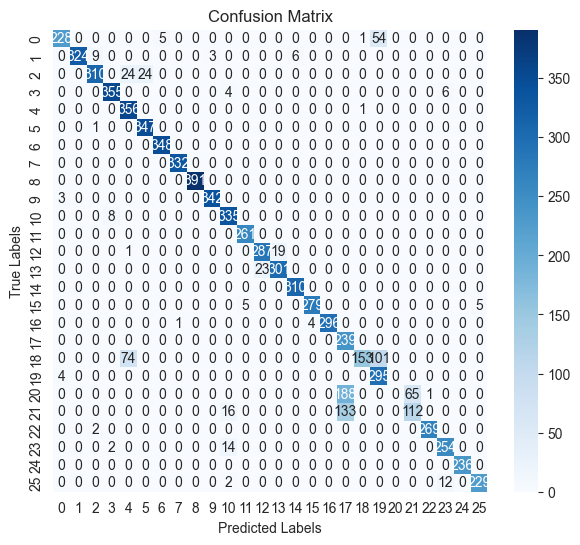

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       288
           1       1.00      0.95      0.97       342
           2       0.96      0.87      0.91       358
           3       0.97      0.97      0.97       365
           4       0.78      1.00      0.88       357
           5       0.94      1.00      0.97       348
           6       0.99      1.00      0.99       348
           7       1.00      1.00      1.00       332
           8       1.00      1.00      1.00       391
           9       0.99      0.99      0.99       345
          10       0.90      0.98      0.94       343
          11       0.98      1.00      0.99       261
          12       0.93      0.93      0.93       307
          13       0.94      0.93      0.93       324
          14       0.98      1.00      0.99       310
          15       0.99      0.97      0.98       289
          16       1.00      0.98      0.99       301
   

C:\Users\Admin\PycharmProjects\jehan-asl-training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\PycharmProjects\jehan-asl-training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\PycharmProjects\jehan-asl-training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score
from sklearn.preprocessing import label_binarize

def print_confusion_matrix_and_map(y_true, y_pred_probs, report=True):
    # Convert probabilities to predicted class labels
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Confusion Matrix
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    # Plot Confusion Matrix
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', cmap="Blues", square=False)
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    # Print classification report
    if report:
        print('Classification Report:\n')
        print(classification_report(y_true, y_pred))

    # mAP calculation
    num_classes = len(labels)
    y_true_onehot = label_binarize(y_true, classes=labels)  # One-hot encode true labels

    mAP = average_precision_score(y_true_onehot, y_pred_probs, average='macro')
    print(f'\nApproximate Mean Average Precision (mAP): {mAP:.4f}')

# === Usage Example ===

# Predict probabilities for each class
Y_pred = model.predict(X_test)          # shape: [n_samples, n_classes]
y_test = np.array(y_test)               # make sure it's a NumPy array if it isn't already

# Call the function
print_confusion_matrix_and_map(y_test, Y_pred)  

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpmvx7vf6w\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpmvx7vf6w\assets


Saved artifact at 'C:\Users\Admin\AppData\Local\Temp\tmpmvx7vf6w'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  1369623287888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1369623284048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1369623290384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1369623289424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1369623293648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1369623291344: TensorSpec(shape=(), dtype=tf.resource, name=None)


7540

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\Admin\PycharmProjects\jehan-asl-training\.venv\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.43 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.0451298e-01 7.3845580e-04 1.3528406e-04 2.5233573e-09 1.0605588e-03
 1.6686625e-08 4.1644834e-04 4.3751280e-07 1.4452395e-04 7.3090053e-01
 5.4135637e-20 3.7185853e-08 7.0236874e-18 1.9675235e-15 5.4251093e-02
 7.7150322e-09 1.6671121e-09 3.1225705e-35 6.6853520e-03 3.0221183e-05
 8.5705731e-27 1.5262446e-26 1.1852016e-15 2.6619193e-17 1.1242058e-03
 5.2470544e-13]
9
